### Importing the dependencies

In [1]:
# Import essential libraries
import numpy as np
import pandas as pd # read data from csv
import matplotlib.pyplot as plt
import seaborn as sns  # for data visualization and styling

# Preprocessing and data balancing
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

# Model training and evaluation
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import XGBClassifier

# Model performance metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Save and load model
import pickle


#### 2.Data Loading & Understanding

In [2]:
# read the csv data to a pandas dataframe 
df = pd.read_csv("C:/Users/gulab/Downloads/train.csv")

#### 3.Initial inspection 

In [3]:
df.shape # count of rows & colm

(800, 22)

In [4]:
df.head() #top 5 rows

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [5]:
df.tail() # last 5 rows

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
795,796,0,1,0,0,0,0,0,0,1,...,m,Hispanic,no,no,New Zealand,no,12.999501,18 and more,Self,0
796,797,0,1,1,0,0,1,0,1,1,...,m,White-European,no,no,Cyprus,no,13.561518,18 and more,Self,0
797,798,0,0,0,0,0,0,0,0,0,...,m,South Asian,yes,no,New Zealand,no,2.653177,18 and more,Self,0
798,799,0,0,0,0,0,0,0,0,0,...,f,?,no,no,Canada,no,9.069342,18 and more,Self,0
799,800,0,1,0,0,0,0,0,0,0,...,f,?,no,no,United Arab Emirates,yes,2.243304,18 and more,Self,0


#### Display all colm of a dataframe

In [6]:
pd.set_option('display.max_columns',None)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [8]:
# convert age column datatype to integer
df["age"] = df["age"].astype(int)

In [9]:
df.head(2)



,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,18 and more,Self,0


In [10]:
for col in df.columns:
    numerical_features = ["ID", "age", "result"]
    if col not in numerical_features:
        print(col,df[col].unique())
        print("-"*50)

A1_Score [1 0]
--------------------------------------------------
A2_Score [0 1]
--------------------------------------------------
A3_Score [1 0]
--------------------------------------------------
A4_Score [0 1]
--------------------------------------------------
A5_Score [1 0]
--------------------------------------------------
A6_Score [0 1]
--------------------------------------------------
A7_Score [1 0]
--------------------------------------------------
A8_Score [0 1]
--------------------------------------------------
A9_Score [1 0]
--------------------------------------------------
A10_Score [1 0]
--------------------------------------------------
gender ['f' 'm']
--------------------------------------------------
ethnicity ['?' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Others'
 'Hispanic' 'Asian' 'Turkish' 'South Asian' 'Latino' 'others']
--------------------------------------------------
jaundice ['no' 'yes']
--------------------------------------------------
austim

In [11]:
# droping ID & age_desc colmn
df - df.drop(columns-["ID","age_desc"])

NameError: name 'columns' is not defined

In [12]:
df.shape

(800, 22)

In [13]:
df.head(2)

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,18 and more,Self,0


In [19]:
df.columns

Index(['ID', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age',
       'gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

In [20]:
df["contry_of_res"].unique() 

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Viet Nam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'AmericanSamoa', 'Bahamas', 'Saudi Arabia',
       'Ireland', 'Aruba', 'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan',
       'Armenia', 'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'Hong Kong',
       'Angola', 'China', 'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran',
       'Argentina', 'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone',
       'Czech Republic', 'Niger', 'Romania', 'Cyprus', 'Belgium',
       'Burundi', 'Bangladesh'], dtype=object)

In [21]:
# define the mapping the dictionary for country names 
mapping - {
    "Viet Nam": "VietNam",
    "AmericanSamoa": "United States",
    "Hong Kong":"chaina"
}

# replace val in  the country colm
df["contry_of_res"]= df["contry_of_res"].replace(mapping)    

NameError: name 'mapping' is not defined

In [22]:
df["contry_of_res"].unique() #here remove AmericanSamoa & Hong Kong

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Viet Nam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'AmericanSamoa', 'Bahamas', 'Saudi Arabia',
       'Ireland', 'Aruba', 'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan',
       'Armenia', 'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'Hong Kong',
       'Angola', 'China', 'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran',
       'Argentina', 'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone',
       'Czech Republic', 'Niger', 'Romania', 'Cyprus', 'Belgium',
       'Burundi', 'Bangladesh'], dtype=object)

In [23]:
# target class distribution
df["Class/ASD"].value_counts()

Class/ASD
0    639
1    161
Name: count, dtype: int64

### Exploratory Data Analysis(EDA)

In [24]:
df.shape

(800, 22)

In [25]:
df.columns

Index(['ID', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age',
       'gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

In [26]:
df.head(2)

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,18 and more,Self,0


In [27]:
df.describe()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.0000,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,400.5000,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,27.963750,8.537303,0.201250
std,231.0844,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,16.329827,4.807676,0.401185
min,1.0000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,-6.137748,0.000000
25%,200.7500,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,5.306575,0.000000
50%,400.5000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.000000,9.605299,0.000000
75%,600.2500,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.250000,12.514484,0.000000
max,800.0000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.000000,15.853126,1.000000


#### Univariate Analysis

In [28]:
# set the desired theme
sns.set_theme(style="darkgrid")


mean: age_mean
median: age_median


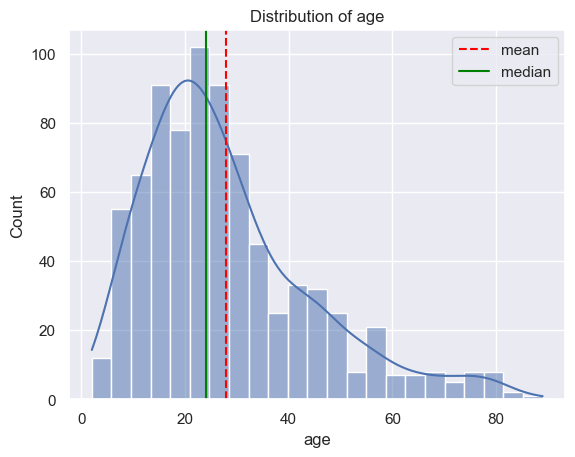

In [29]:
#Histogram for "age"
sns.histplot(df["age"],kde=True) # kde used to draw smooth curve line
plt.title("Distribution of age")

# calculated mean & median
age_mean =df ["age"].mean()
age_median =df ["age"].median()

print("mean:","age_mean")
print("median:","age_median")

#add vertical line for mean & median 
plt.axvline(age_mean,color="red",linestyle="--", label="mean")
plt.axvline(age_median,color="green",linestyle="-", label="median")
plt.legend()
plt.show()


mean: result_mean
median: result_median


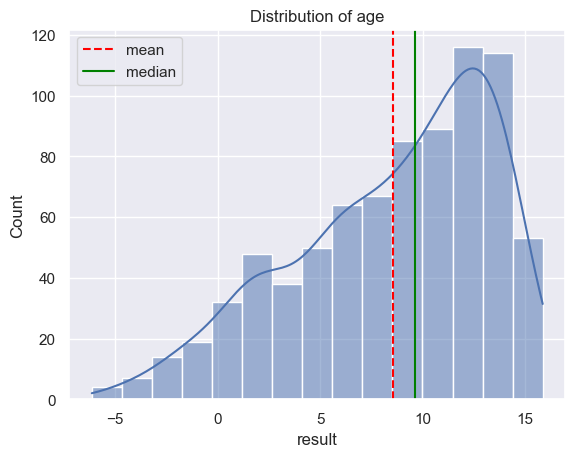

In [30]:
#Histogram for "result"
sns.histplot(df["result"],kde=True) # kde used to draw smooth curve line
plt.title("Distribution of age")

# calculated mean & median
age_mean =df ["result"].mean()
age_median =df ["result"].median()

print("mean:","result_mean")
print("median:","result_median")

#add vertical line for mean & median 
plt.axvline(age_mean,color="red",linestyle="--", label="mean")
plt.axvline(age_median,color="green",linestyle="-", label="median")
plt.legend()
plt.show()


## Box plot for identifying in the numerical colmns

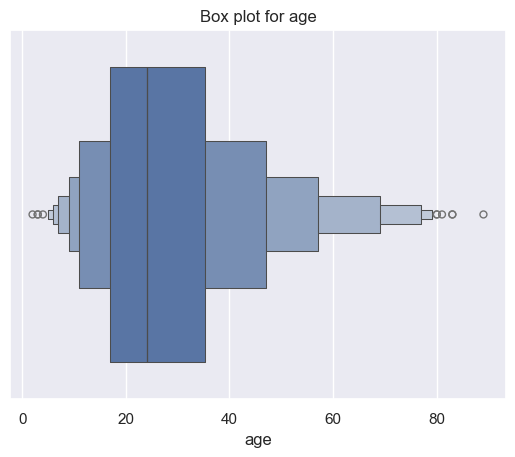

In [31]:
# boxplot
sns.boxenplot (x=df["age"])
plt.title("Box plot for age")
plt.xlabel("age")
plt.show()  # 0000 is the outliers 

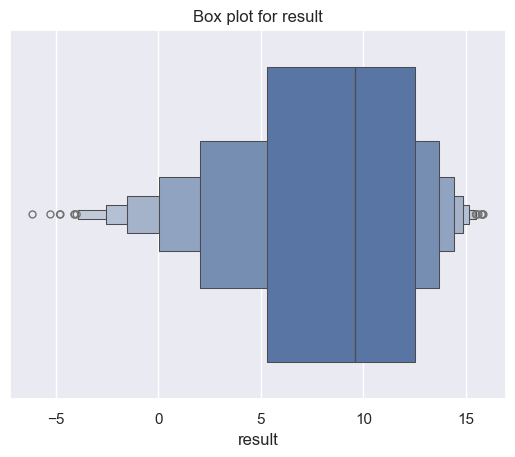

In [32]:
# boxplot for result
sns.boxenplot (x=df["result"])
plt.title("Box plot for result")
plt.xlabel("result")
plt.show()  # 0000 is the outliers 

In [33]:
## count the outlier ising IQR method
Q1= df["age"].quantile(0.25)
Q3= df["age"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
age_outliers = df[(df["age"] < lower_bound) | (df["age"] > upper_bound)]

In [34]:
len(age_outliers)

39

In [35]:
Q1= df["result"].quantile(0.25)
Q3= df["result"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
result_outliers = df[(df["result"] < lower_bound) | (df["result"] > upper_bound)]

In [36]:
len(result_outliers)

1

## Univariate analysis of categorical colmns

In [37]:
df.columns

Index(['ID', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age',
       'gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

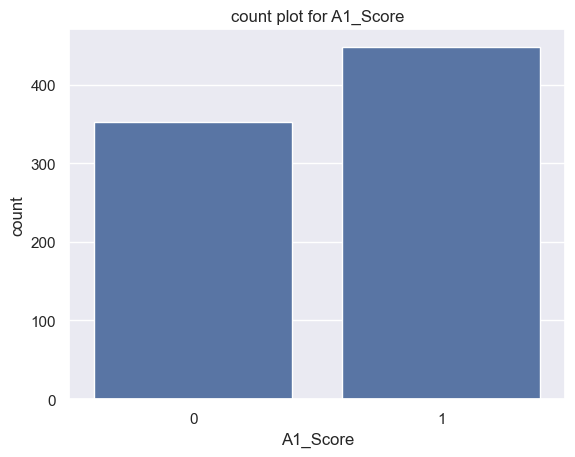

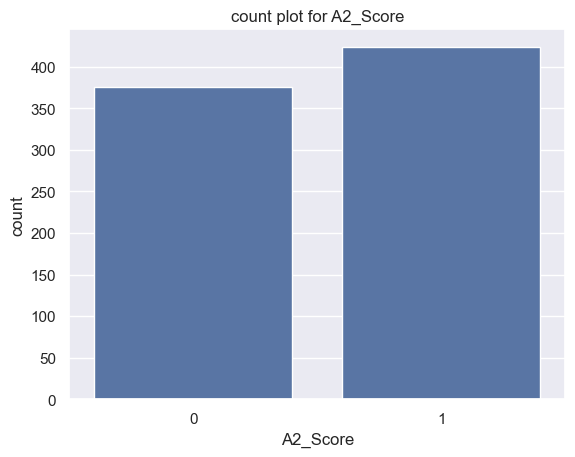

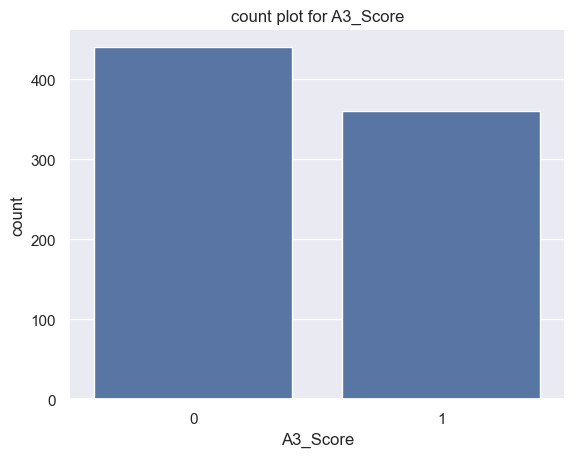

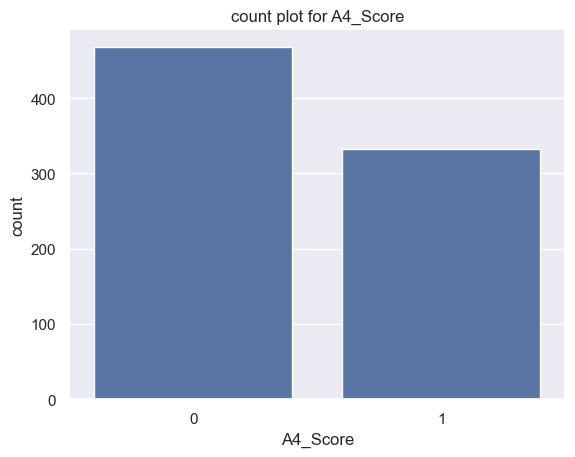

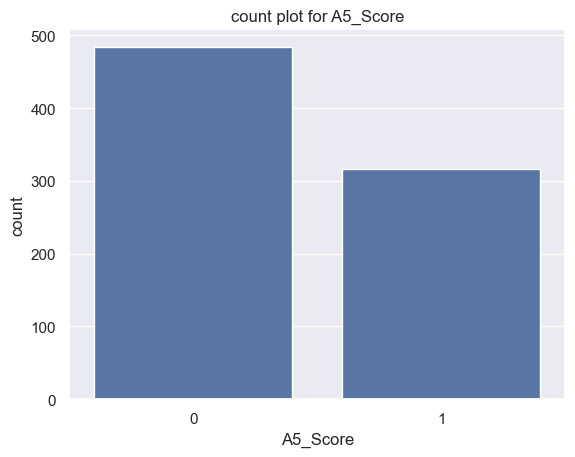

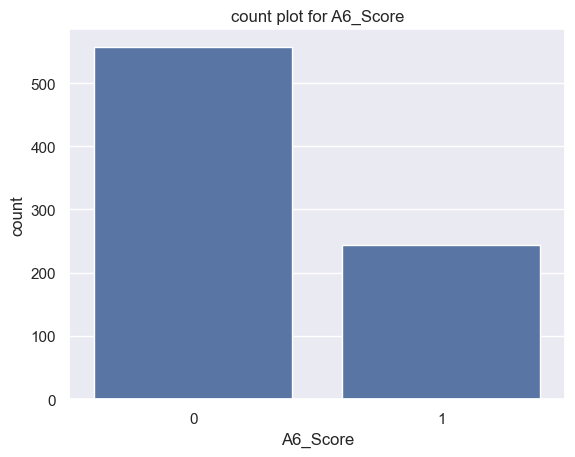

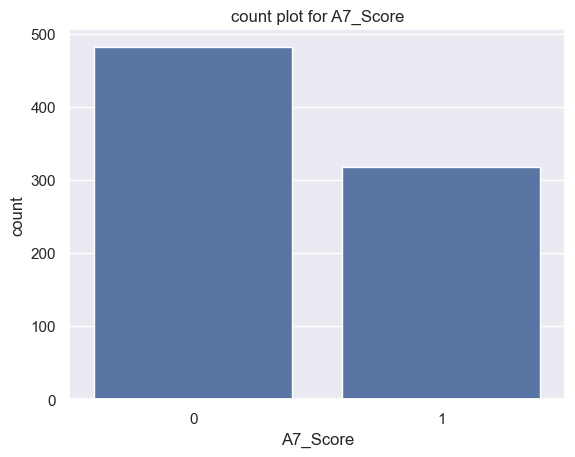

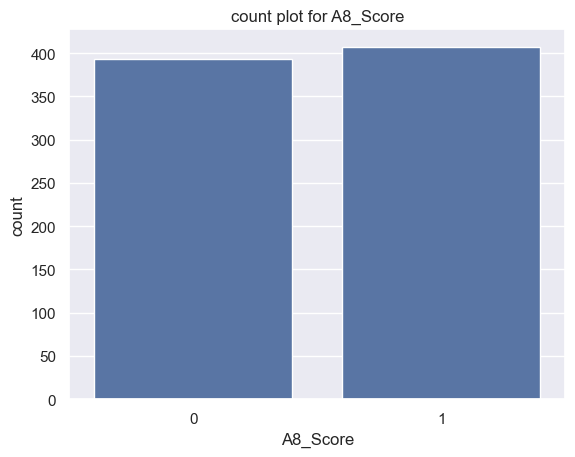

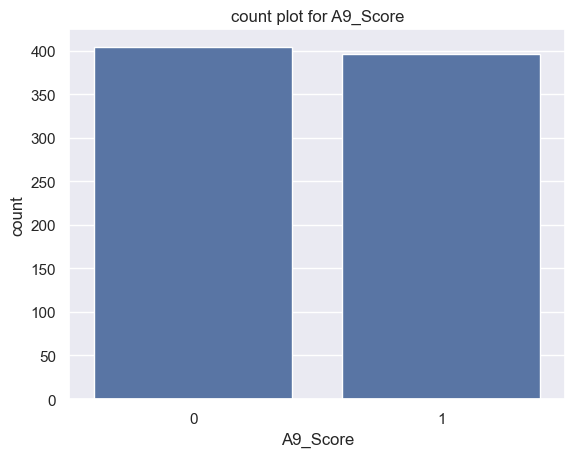

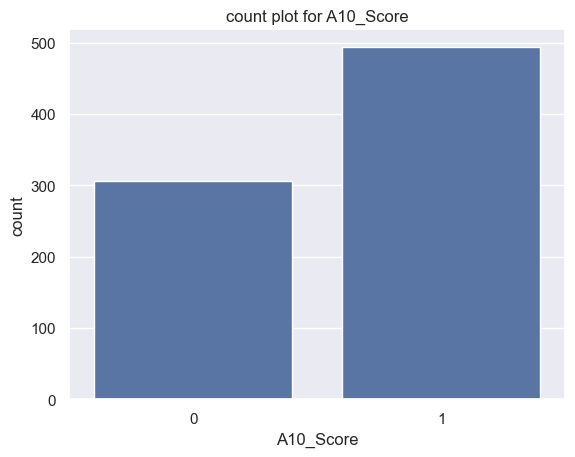

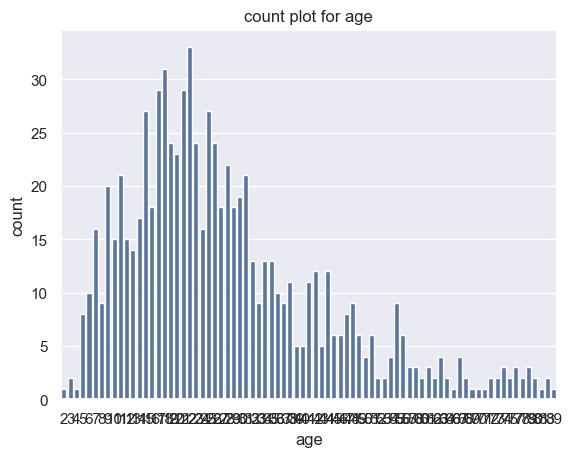

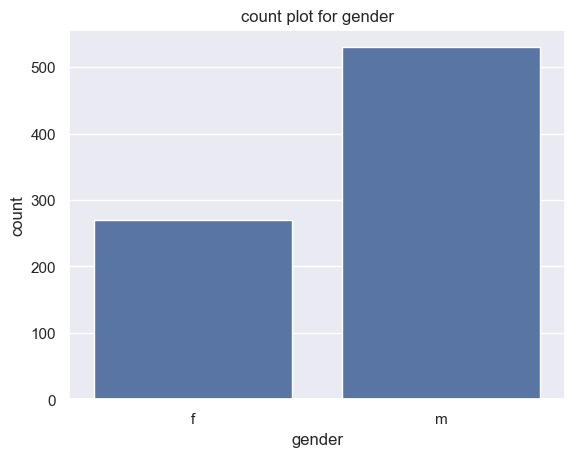

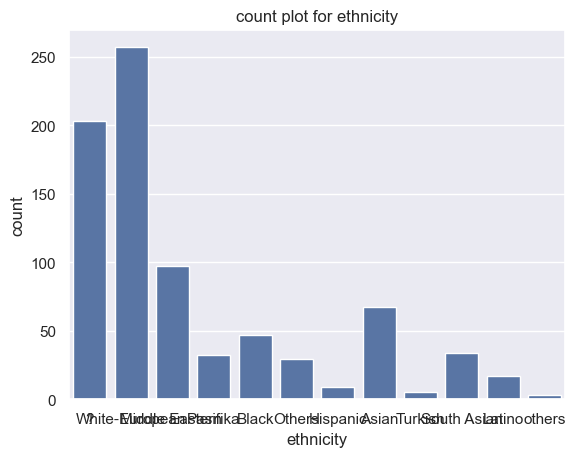

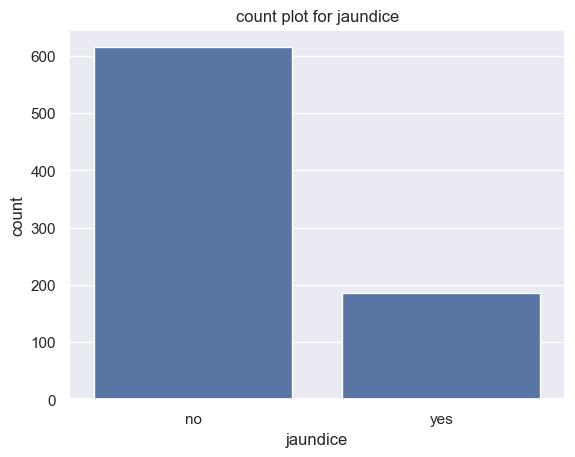

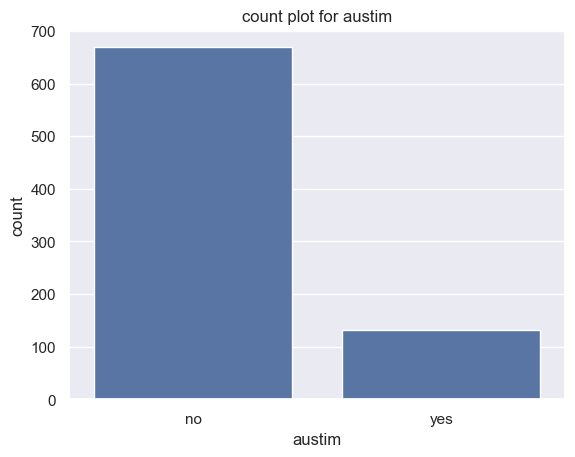

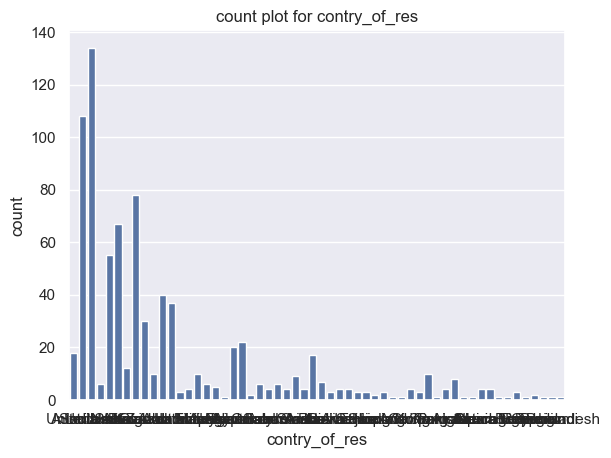

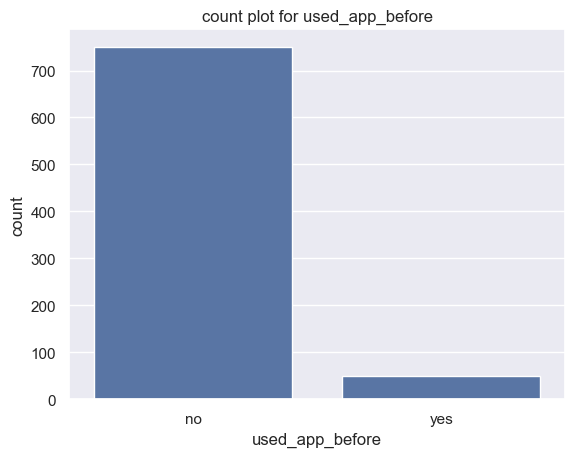

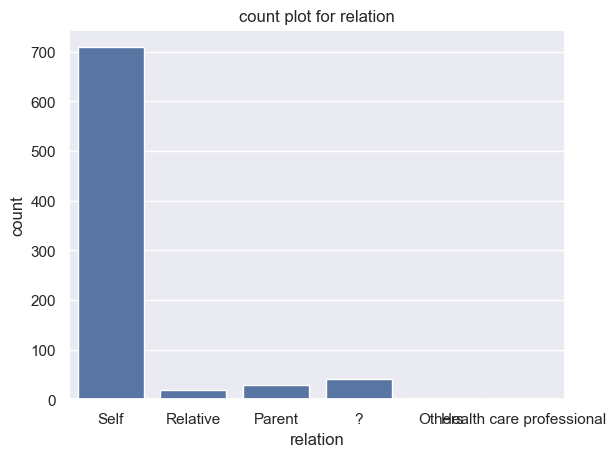

In [38]:
categorical_columns = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age',
       'gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before',  'relation']
for col in categorical_columns:
    sns.countplot(x=df[col])
    plt.title(f"count plot for {col}")
    plt.xlabel(col)
    plt.ylabel("count")
    plt.show()

     

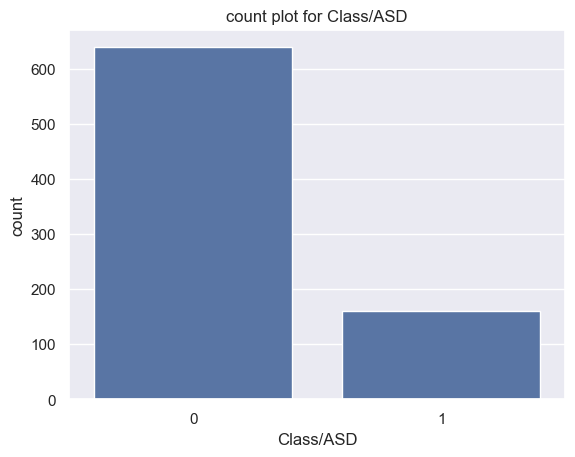

In [39]:
# countplot for target column (class/ASD)
sns.countplot(x=df["Class/ASD"])
plt.title("count plot for Class/ASD")
plt.xlabel("Class/ASD")
plt.ylabel("count")
plt.show()

In [40]:
df["Class/ASD"].value_counts()

Class/ASD
0    639
1    161
Name: count, dtype: int64

In [41]:
# handle missing val in ethnicity & relation colm
df["ethnicity"] =  df["ethnicity"].replace({"?": "others", "others": "others"})

In [42]:
df["relation"].unique()

array(['Self', 'Relative', 'Parent', '?', 'Others',
       'Health care professional'], dtype=object)

In [43]:
df["relation"] = df["relation"].replace(
    {"?": "other",
     "Relative": "other",
    "Parent": "other",
    "Health care professional": "other"}
)

In [44]:
df["relation"].unique()

array(['Self', 'other', 'Others'], dtype=object)

In [45]:
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38,f,others,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,0,47,m,others,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,1,7,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,0,23,f,others,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,0,43,m,others,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [46]:
#tm:1.16

# data encoding (its an data preproccesing )

In [47]:
# not going foe seperately for age ..result etc inisted of that using for loop for all this col
# identifying colm with "object " data type
object_columns = df.select_dtypes(include=["object"]).columns

In [48]:
print(object_columns)

Index(['gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'age_desc', 'relation'],
      dtype='object')


In [52]:
# initialize a dictionary to store the encodersabs
encoders = {}

# apply label encoding and store the encoders
for column in object_columns:
    label_encoder = LabelEncoder()
    df[column] = label_encoder.fit_transform(df[column])
    encoders[column] = label_encoder #saving the encoder for column

# sace the encoders in a pickle file 
with open("encoders.pkl","wb") as f:
    pickle.dump(encoders,f)

In [53]:
encoders

{'gender': LabelEncoder(),
 'ethnicity': LabelEncoder(),
 'jaundice': LabelEncoder(),
 'austim': LabelEncoder(),
 'contry_of_res': LabelEncoder(),
 'used_app_before': LabelEncoder(),
 'age_desc': LabelEncoder(),
 'relation': LabelEncoder()}

In [54]:
df.head() # encoder replace str into numerical val eg:gender 0

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38,0,10,0,0,7,0,6.351166,0,1,0
1,2,0,0,0,0,0,0,0,0,0,0,47,1,10,0,0,25,0,2.255185,0,1,0
2,3,1,1,1,1,1,1,1,1,1,1,7,1,9,0,1,54,0,14.851484,0,1,1
3,4,0,0,0,0,0,0,0,0,0,0,23,0,10,0,0,54,0,2.276617,0,1,0
4,5,0,0,0,0,0,0,0,0,0,0,43,1,10,0,0,46,0,-4.777286,0,1,0


# Bivariate Analysis 

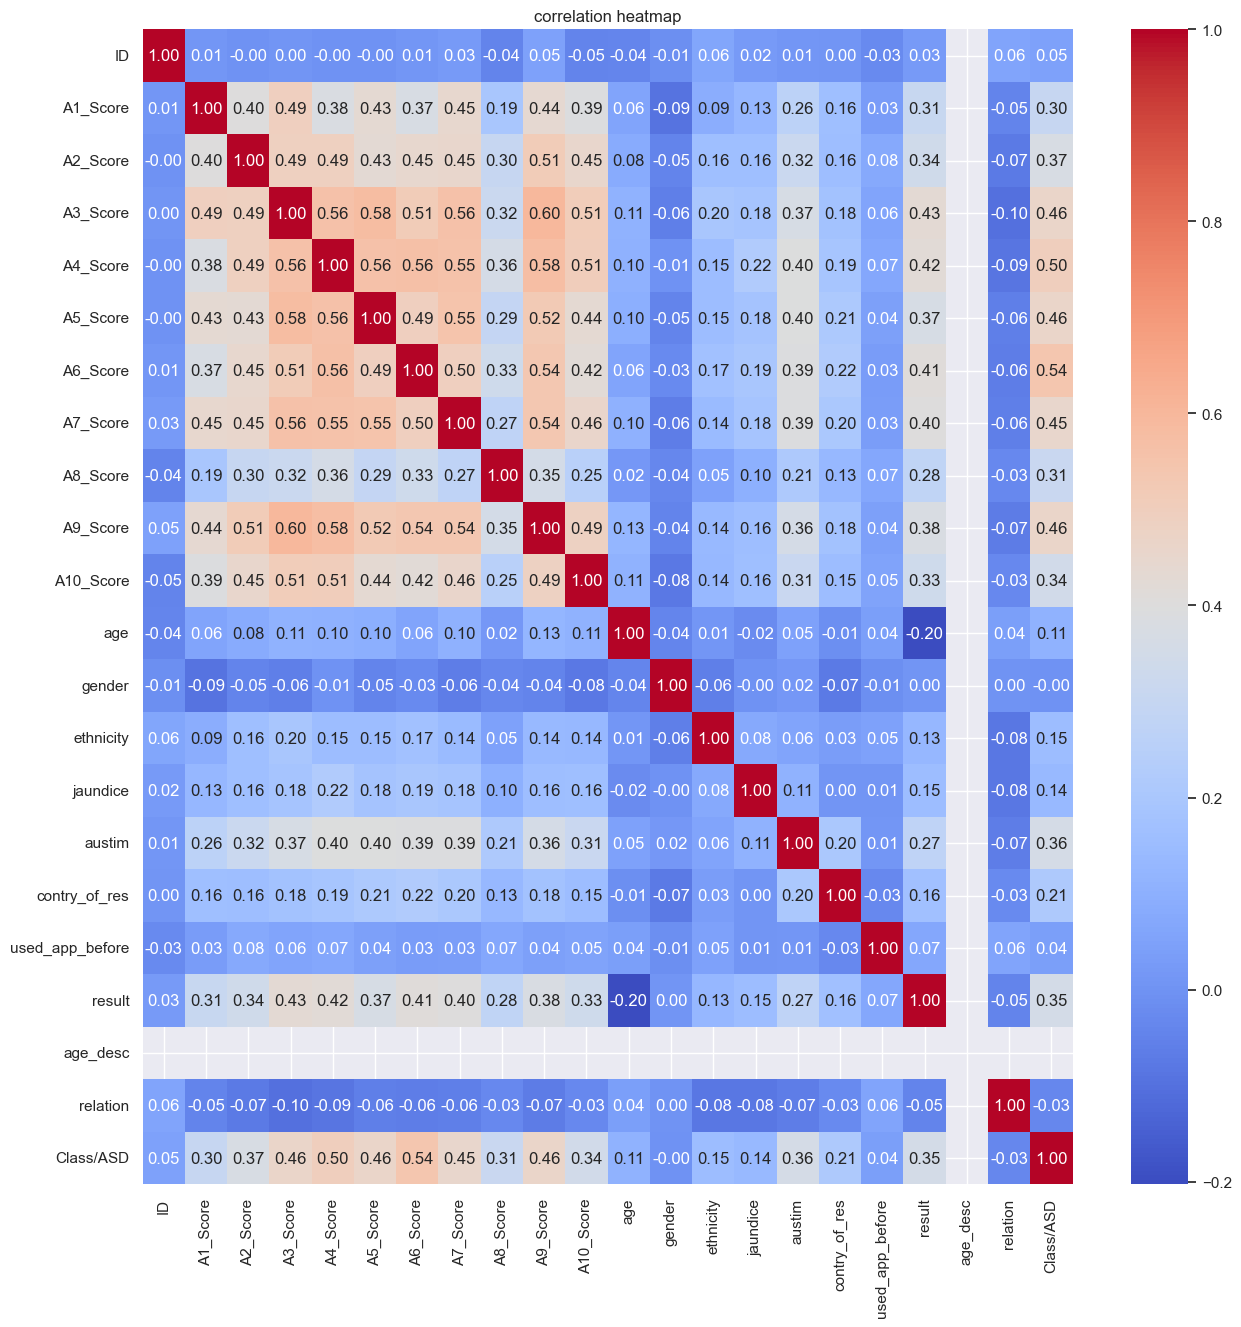

In [55]:
# correlation matrix
plt.figure(figsize= (15,15))
sns.heatmap(df.corr(), annot=True,cmap= "coolwarm", fmt= ".2f")
plt.title("correlation heatmap")
plt.show()

# Insights from EDA
* there are few outlier in the numerical column (age,result )
* there is few class imbalance in the target column
* there is an class in the categorical feture 
* we dont have any highly corelatted colm 
* perform label encoding & saved the encoders 

# 4.Data preprocessing 

## Handling the outliers

In [56]:
# function to replace the outliers with median
def replace_outliers_with_median(df,column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    lower_bound = Q3 + 1.5 * IQR

    median = df [column].median()

    # replace outlier with median vall
    df[column] = df[column].apply(lambda x: median if x < lower_bound or x > upper_bound else x)
      # x < lower_bound or x > upper_bound is outliers 
    return df


In [57]:
# replace outlier in the "age " ccolumn
df = replace_outliers_with_median(df,"age")

# replace outliers in the "result" ccolumn
df = replace_outliers_with_median(df,"result") # remove outliers

In [58]:
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,24.0,0,10,0,0,7,0,9.605299,0,1,0
1,2,0,0,0,0,0,0,0,0,0,0,24.0,1,10,0,0,25,0,9.605299,0,1,0
2,3,1,1,1,1,1,1,1,1,1,1,24.0,1,9,0,1,54,0,9.605299,0,1,1
3,4,0,0,0,0,0,0,0,0,0,0,24.0,0,10,0,0,54,0,9.605299,0,1,0
4,5,0,0,0,0,0,0,0,0,0,0,24.0,1,10,0,0,46,0,9.605299,0,1,0


In [59]:
df.shape

(800, 22)

In [60]:
df

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,24.0,0,10,0,0,7,0,9.605299,0,1,0
1,2,0,0,0,0,0,0,0,0,0,0,24.0,1,10,0,0,25,0,9.605299,0,1,0
2,3,1,1,1,1,1,1,1,1,1,1,24.0,1,9,0,1,54,0,9.605299,0,1,1
3,4,0,0,0,0,0,0,0,0,0,0,24.0,0,10,0,0,54,0,9.605299,0,1,0
4,5,0,0,0,0,0,0,0,0,0,0,24.0,1,10,0,0,46,0,9.605299,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,0,1,0,0,0,0,0,0,1,1,24.0,1,2,0,0,36,0,9.605299,0,1,0
796,797,0,1,1,0,0,1,0,1,1,1,24.0,1,9,0,0,17,0,9.605299,0,1,0
797,798,0,0,0,0,0,0,0,0,0,0,24.0,1,7,1,0,36,0,9.605299,0,1,0
798,799,0,0,0,0,0,0,0,0,0,0,24.0,0,10,0,0,15,0,9.605299,0,1,0


In [61]:
x = df.drop(columns=["Class/ASD"]) # 
y = df["Class/ASD"]   # target colm loweer case

In [62]:
print(x)

      ID  A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  \
0      1         1         0         1         0         1         0   
1      2         0         0         0         0         0         0   
2      3         1         1         1         1         1         1   
3      4         0         0         0         0         0         0   
4      5         0         0         0         0         0         0   
..   ...       ...       ...       ...       ...       ...       ...   
795  796         0         1         0         0         0         0   
796  797         0         1         1         0         0         1   
797  798         0         0         0         0         0         0   
798  799         0         0         0         0         0         0   
799  800         0         1         0         0         0         0   

     A7_Score  A8_Score  A9_Score  A10_Score   age  gender  ethnicity  \
0           1         0         1          1  24.0       0    

In [63]:
print(y)

0      0
1      0
2      1
3      0
4      0
      ..
795    0
796    0
797    0
798    0
799    0
Name: Class/ASD, Length: 800, dtype: int64


In [64]:
x_train, x_test,y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=42)

In [65]:
print(y_train.shape)
print(y_test.shape)

(640,)
(160,)


In [66]:
y_train.value_counts()

Class/ASD
0    515
1    125
Name: count, dtype: int64

In [67]:
y_test.value_counts()

Class/ASD
0    124
1     36
Name: count, dtype: int64

# Oversampling tech SMOTE(synthetic minority oversampling tech)

In [68]:
# take 
smote = SMOTE(random_state=42)

In [69]:
x_train_smote,y_train_smote = smote.fit_resample(x_train,y_train)

In [70]:
print(y_train_smote.shape)

(1030,)


In [71]:
print(y_train_smote.value_counts())   # thise data 515 can used to train  our models thats is balance of data to identify diff 

Class/ASD
1    515
0    515
Name: count, dtype: int64


# 5.model Training 
## take model and select which parameter to used 

In [72]:
# dictionary  of classifiers
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42)
}


In [73]:
print(models)

{'Decision Tree': DecisionTreeClassifier(random_state=42), 'Random Forest': RandomForestClassifier(random_state=42), 'XGBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)}


In [74]:
cv_scores = {}   # empty dict

# perform 5-fold cross validation for each model
for model_name, model in models.items():
    print(f"Training {model_name} with default parameters...")

    # correct function name: cross_val_score, not cross_val_scores
    # correct scoring: "accuracy", not "accurancy"
    scores = cross_val_score(model, x_train_smote, y_train_smote, cv=5, scoring="accuracy")

    cv_scores[model_name] = scores

    print(f"{model_name} Cross validation accuracy : {np.mean(scores):.2f}")
    print("-" * 50)


Training Decision Tree with default parameters...
Decision Tree Cross validation accuracy : 0.87
--------------------------------------------------
Training Random Forest with default parameters...
Random Forest Cross validation accuracy : 0.90
--------------------------------------------------
Training XGBoost with default parameters...
XGBoost Cross validation accuracy : 0.90
--------------------------------------------------


In [75]:
cv_scores

{'Decision Tree': array([0.77184466, 0.90291262, 0.88349515, 0.88834951, 0.88349515]),
 'Random Forest': array([0.84951456, 0.94174757, 0.89805825, 0.90291262, 0.89805825]),
 'XGBoost': array([0.82038835, 0.95145631, 0.91747573, 0.93203883, 0.89805825])}

# 6. Model selection & Hyperparameter Tunning 

In [85]:
# 1.Initializing momodels
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
xgboost = XGBClassifier(random_state=42)

In [84]:
# 
import warnings
warnings.filterwarnings("ignore")

import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
from sklearn.utils import check_random_state

RANDOM_STATE = 42
n_iter_search = 20
cv_folds = 5
scoring_metric = "accuracy"

# ---------------------------
# Define estimators
# ---------------------------
decision_tree = DecisionTreeClassifier(random_state=RANDOM_STATE)
random_forest = RandomForestClassifier(random_state=RANDOM_STATE)
xgboost_classifier = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=RANDOM_STATE)

# ---------------------------
#  2.Hyperparameter grid for rRandomizedSearchCV
# ---------------------------
param_grid_dt = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 3, 5, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "class_weight": [None, "balanced"]
}

param_grid_rf = {
    "n_estimators": [50, 100, 200, 300],
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "bootstrap": [True, False],
    "max_features": ["sqrt", "log2", None]
}

param_grid_xgb = {
    "n_estimators": [50, 100, 200],
    "max_depth": [3, 5, 7, 10],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0],
    "gamma": [0, 0.1, 0.3, 0.5]
}

# ---------------------------
# Create RandomizedSearchCV objects # 3. give best mmodels

# hyperparameter  tunning for 3 tree based models 

# the below steps can be automated using for loop by using a pipeline

# performrandomizedsearchCv for each models 
# ---------------------------
random_search_dt = RandomizedSearchCV(
    estimator=decision_tree,
    param_distributions=param_grid_dt,
    n_iter=n_iter_search,
    cv=cv_folds,
    scoring=scoring_metric,
    random_state=RANDOM_STATE,
    n_jobs=-1,
    verbose=1
)

random_search_rf = RandomizedSearchCV(
    estimator=random_forest,
    param_distributions=param_grid_rf,
    n_iter=n_iter_search,
    cv=cv_folds,
    scoring=scoring_metric,
    random_state=RANDOM_STATE,
    n_jobs=-1,
    verbose=1
)

random_search_xgb = RandomizedSearchCV(
    estimator=xgboost_classifier,
    param_distributions=param_grid_xgb,
    n_iter=n_iter_search,
    cv=cv_folds,
    scoring=scoring_metric,
    random_state=RANDOM_STATE,
    n_jobs=-1,
    verbose=1
)

# ---------------------------
# Fit the searches (with defensive try/except)
# ---------------------------
print("Fitting Decision Tree RandomizedSearchCV...")
try:
    random_search_dt.fit(x_train_smote, y_train_smote)
    print("DT done.")
except Exception as e:
    print("Error while fitting DecisionTree RandomizedSearchCV:")
    print(e)

print("\nFitting Random Forest RandomizedSearchCV...")
try:
    random_search_rf.fit(x_train_smote, y_train_smote)
    print("RF done.")
except Exception as e:
    print("Error while fitting RandomForest RandomizedSearchCV:")
    print(e)

print("\nFitting XGBoost RandomizedSearchCV...")
try:
    random_search_xgb.fit(x_train_smote, y_train_smote)
    print("XGB done.")
except Exception as e:
    print("Error while fitting XGBoost RandomizedSearchCV:")
    print(e)

# ---------------------------
# Show best results (if fit succeeded)
# ---------------------------
def print_results(rs, name):
    try:
        print(f"\n{name} best CV score: {rs.best_score_:.4f}")
        print(f"{name} best params: {rs.best_params_}")
    except Exception:
        print(f"{name} search did not complete successfully or no best params available.")

print_results(random_search_dt, "Decision Tree")
print_results(random_search_rf, "Random Forest")
print_results(random_search_xgb, "XGBoost")

# ---------------------------
# Optional: evaluate on test set (if available)
# ---------------------------
try:
    print("\n--- Test set evaluation ---")
    best_dt = random_search_dt.best_estimator_
    preds_dt = best_dt.predict(x_test)
    print("DT test accuracy:", accuracy_score(y_test, preds_dt))
    print(classification_report(y_test, preds_dt))
    print("DT confusion matrix:\n", confusion_matrix(y_test, preds_dt))
except Exception:
    print("Skipping Decision Tree test evaluation (x_test/y_test not available or DT failed).")

try:
    best_rf = random_search_rf.best_estimator_
    preds_rf = best_rf.predict(x_test)
    print("RF test accuracy:", accuracy_score(y_test, preds_rf))
    print(classification_report(y_test, preds_rf))
    print("RF confusion matrix:\n", confusion_matrix(y_test, preds_rf))
except Exception:
    print("Skipping Random Forest test evaluation (x_test/y_test not available or RF failed).")

try:
    best_xgb = random_search_xgb.best_estimator_
    preds_xgb = best_xgb.predict(x_test)
    print("XGB test accuracy:", accuracy_score(y_test, preds_xgb))
    print(classification_report(y_test, preds_xgb))
    print("XGB confusion matrix:\n", confusion_matrix(y_test, preds_xgb))
except Exception:
    print("Skipping XGBoost test evaluation (x_test/y_test not available or XGB failed).")


Fitting Decision Tree RandomizedSearchCV...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
DT done.

Fitting Random Forest RandomizedSearchCV...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
RF done.

Fitting XGBoost RandomizedSearchCV...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
XGB done.

Decision Tree best CV score: 0.8699
Decision Tree best params: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None, 'criterion': 'entropy', 'class_weight': None}

Random Forest best CV score: 0.8961
Random Forest best params: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': None, 'bootstrap': False}

XGBoost best CV score: 0.9146
XGBoost best params: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.2, 'gamma': 0.1, 'colsample_bytree': 0.8}

--- Test set evaluation ---
DT test accuracy: 0.79375
              precision    recall  f1-score   support

      

# Evalution 

In [ ]:
# To do :
## 1.Build a predicted system with encoders and modelm file 
## 2.see if you could improve the performance 